In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [13]:
data = pd.read_excel('Data/full_data_2022-01-10.xlsx')


n_comp = 10
cols = []
for c in data.columns:
    if 'afp' in c or 'bfp' in c or 'mfp' in c or 'efp' in c:
        cols.append(c)
df = data[['Polymer'] +cols].dropna().drop_duplicates(subset = cols)
pca = PCA(n_components = n_comp)
pca.fit(df[cols])
print('Explained variance (ratio): ' + str(pca.explained_variance_ratio_))
print('Total variance in ' + str(n_comp) + ' components = ' + str(sum(pca.explained_variance_ratio_)))
filtered = data.dropna(subset = cols).reset_index(drop = True)
out = filtered[['Mw', 'Temperature', 'Shear_Rate','Melt_Viscosity', 'Polymer']].join(pd.DataFrame(pca.transform(filtered[cols])))
#return out, list(np.linspace(0,10-1,10).astype(int))

Explained variance (ratio): [0.2743095  0.17386684 0.11326783 0.06974285 0.05693196 0.04851768
 0.04204771 0.03050702 0.02257535 0.02200636]
Total variance in 10 components = 0.8537730970986169


PCA(n_components=10)

In [9]:
print((pca.explained_variance_ratio_))

[0.2743095  0.17386684 0.11326783 0.06974285 0.05693196 0.04851768
 0.04204771 0.03050702 0.02257535 0.02200636]


In [16]:
comps = pd.DataFrame(pca.transform(df[cols]))
comps = comps.join(df['Polymer'].reset_index(drop = True))
colors = comps['Polymer'] == 'p'
colors[colors == False] = 'grey'
colors[colors == True] = 'r'

Text(0.5, 0.92, 'Polymer Fingerprint Space - 0.5614441679994183 Variance Captured')

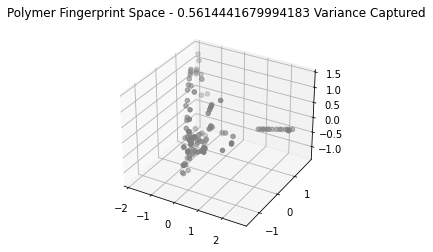

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(comps[0], comps[1], comps[2], c= colors)
plt.title('Polymer Fingerprint Space - ' + str(np.sum(pca.explained_variance_ratio_[:3])) + ' Variance Captured')

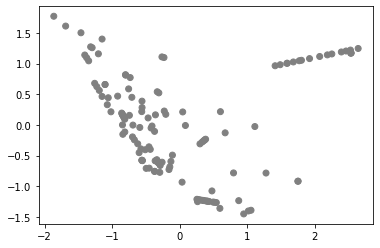

In [18]:
plt.scatter(comps[0], comps[1], c= colors)

,Mw,Temperature,Shear_Rate,Melt_Viscosity,Polymer,0,1,2,3,4,5,6,7,8,9
0,3900.0,200.0,0.000000,0.500000,poly(prop-1-ene),-0.78939,0.544235,1.395861,0.699218,-0.226599,-0.878079,-1.222811,-0.964717,1.723224,0.159295
1,17000.0,200.0,0.000000,5.000000,poly(prop-1-ene),-0.78939,0.544235,1.395861,0.699218,-0.226599,-0.878079,-1.222811,-0.964717,1.723224,0.159295
2,71000.0,200.0,0.000000,130.000000,poly(prop-1-ene),-0.78939,0.544235,1.395861,0.699218,-0.226599,-0.878079,-1.222811,-0.964717,1.723224,0.159295
3,103000.0,200.0,0.000000,500.000000,poly(prop-1-ene),-0.78939,0.544235,1.395861,0.699218,-0.226599,-0.878079,-1.222811,-0.964717,1.723224,0.159295
4,250000.0,200.0,0.000000,6000.000000,poly(prop-1-ene),-0.78939,0.544235,1.395861,0.699218,-0.226599,-0.878079,-1.222811,-0.964717,1.723224,0.159295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,34400.0,200.0,115.404361,124.812098,"poly(dodecano-12-lactam), PPTA",-0.50891,-1.193754,-0.037197,-0.871874,-0.546017,0.017791,-0.164861,0.056313,0.042733,0.017646
958,34400.0,200.0,192.506077,92.878339,"poly(dodecano-12-lactam), PPTA",-0.50891,-1.193754,-0.037197,-0.871874,-0.546017,0.017791,-0.164861,0.056313,0.042733,0.017646
959,34400.0,200.0,386.070543,56.755858,"poly(dodecano-12-lactam), PPTA",-0.50891,-1.193754,-0.037197,-0.871874,-0.546017,0.017791,-0.164861,0.056313,0.042733,0.017646
960,34400.0,200.0,575.439937,41.207215,"poly(dodecano-12-lactam), PPTA",-0.50891,-1.193754,-0.037197,-0.871874,-0.546017,0.017791,-0.164861,0.056313,0.042733,0.017646


In [164]:
list(np.linspace(0,10-1,10).astype(int))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]